# Customer Lifetime Value (CLV) Exploratory Data Analysis

### Introduction

The business world has seen a major shift, with companies placing an increasing emphasis on their customers. In today’s competitive market, a customer-focused strategy has become the norm, driven by the abundance of choices available to consumers when choosing products or services.

As businesses compete by better meeting customer needs and expanding their market presence, the value of growing and retaining their customer base becomes crucial.

However, like attracting new customers, keeping existing ones also involves significant expenses (such as discounts, personalized offers, etc.).

This leads to an important question: should businesses aim to retain every customer? Not necessarily. In every business, certain customers offer more value through their long-term loyalty, while others may only make a single purchase. Recognizing these different customer groups and concentrating on the high-value ones is critical for sustaining a position in today’s highly competitive environment.

The real challenge, however, is identifying which customers are the most valuable.

### What is Customer Value?
Customer Value, often called Customer Lifetime Value (CLV), represents the total financial worth of all transactions a customer makes with your business during their entire relationship. "Lifetime" refers to the period a customer continues to purchase from your business before moving to a competitor.

### Project Details

This project focuses on estimating Customer Lifetime Value (CLV) using a dataset of online retail transactions. The dataset includes information on customer demographics, transaction history, and product details. The goal is to gain a deep understanding of customer behavior, identify high-value customers, and develop strategies to maximize CLV.

The following steps were taken to achieve the project objectives:

1. **Data Exploration**: 
   We began by thoroughly exploring the dataset, understanding the structure, and assessing its features. This involved checking for missing data, outliers, and inconsistencies, ensuring the integrity and accuracy of the data. We particularly focused on key variables like `CustomerID`, `InvoiceNo`, `InvoiceDate`, `Quantity`, `UnitPrice`, and `MonetaryValue`.

2. **Visualization**:
   Data visualization played a crucial role in communicating the findings. We used various graphs and charts to visually represent customer purchasing behavior, sales trends, and other key insights. This made it easier to comprehend the differences between customer segments and their overall contribution to business performance.

### Exploratory Data Analysis (EDA) Questions:

To uncover key insights about customer behavior and transaction patterns, the following questions were explored:

1. **Top 10 Most Purchased Products**: 
   
2. **Top 10 Products by Total Sales**: 
   
3. **Top 10 Products Sold by Quantity**: 
   
4. **Top 5 Countries by Total Sales Value**: 
   
5. **Transaction Patterns by Time of Day and Day of the Week**: 
   
6. **Transaction Trends Over Time**: 
   
7. **Monthly Sales Distribution**: 
   
8. **Total Sales Per Week**: 
   
9. **Customer Distribution by Revenue and Orders**: 
   
10. **Revenue Contribution by Customer Segments**: 
    
11. **Seasonal Patterns in Sales**: 
    
This exploratory analysis provided a strong foundation for understanding customer behavior and informed the subsequent steps in estimating Customer Lifetime Value (CLV). The insights gained from this analysis will allow us to focus on retaining high-value customers, improve marketing efficiency, and drive sustainable business growth.

## 1). Data Collection

- Dataset is downloaded from https://archive.ics.uci.edu/dataset/352/online+retail
- The data consists of 541909 rows and 8 columns

### Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [173]:
data = pd.read_csv("data/OnlineRetail.csv", parse_dates=['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


**Shape of the Dataset**

In [174]:
data.shape

(541909, 8)

**Creating a new column Total Sales**

In [175]:
data_clv = data
data_clv['TotalSales'] = data_clv['Quantity'].multiply(data_clv['UnitPrice'])
print(data_clv.shape)
print(data_clv.head())

(541909, 9)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0  01/12/2010 08:26       2.55     17850.0  United Kingdom       15.30  
1  01/12/2010 08:26       3.39     17850.0  United Kingdom       20.34  
2  01/12/2010 08:26       2.75     17850.0  United Kingdom       22.00  
3  01/12/2010 08:26       3.39     17850.0  United Kingdom       20.34  
4  01/12/2010 08:26       3.39     17850.0  United Kingdom       20.34  


**Summary of the dataset**

In [176]:
data_clv.describe()

,Quantity,UnitPrice,CustomerID,TotalSales
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


There are some negative values in the Quantity variable and this is mainly because of returns and that causes the negative values in UnitPrice and TotalSales variable as well. Also, there are some other factors such as discount etc., are also contributing to the negative value in price.

In our Customer Lifetime Value calculation, we are interested only in the total value a customer can generate to the business over his/her lifetime, we can simply drop negative values in Quantity & UnitPrice and work with only positive values.

In [177]:
data_clv = data_clv[data_clv['TotalSales'] > 0]
data_clv.describe()

,Quantity,UnitPrice,CustomerID,TotalSales
count,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.542037,3.907625,15294.423453,20.121871
std,155.524124,35.915681,1713.141560,270.356743
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [178]:
data_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,20.34


**Check for Datatypes in the dataset**

In [179]:
data_clv.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalSales     float64
dtype: object

In [180]:
# Changing the InvoiceData data type
data_clv['InvoiceDate'] = pd.to_datetime(data_clv['InvoiceDate'], dayfirst=True, errors='coerce')

In [181]:
data_clv.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSales            float64
dtype: object

In [182]:
data_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**Checking for Missing Values**

In [183]:
data_clv.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
TotalSales          0
dtype: int64

In [184]:
pd.DataFrame(zip(data_clv.isnull().sum(),data_clv.isnull().sum()/len(data_clv)), columns=['count', 'Proportion'], index=data_clv.columns)

,count,Proportion
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,0.249423
Country,0,0.000000
TotalSales,0,0.000000


So, clearly we have around 24% missing values in the CustomerID variable.

The main objective of our project is to calculate the lifetime value of each customer. Here each customer is identified by the unique CustomerID.Then How could we able to do that, if we don't have CustomerID in the first place?

So, let's drop the null values in the CustomerID variable.

In [185]:
# Dropping the null values in the CustomerID variable
data_clv = data_clv[pd.notnull(data_clv['CustomerID'])]


In [186]:
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns = ['Count', 'Proportion'], index = data_clv.columns)

,Count,Proportion
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0
TotalSales,0,0.0


In [187]:
data_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [188]:
data_clv['CustomerID'] = data_clv['CustomerID'].apply(lambda x: int(x))

In [189]:
data_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [190]:
data_clv.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalSales            float64
dtype: object

## 2). EXPLORING DATA

**Defining numerical & categorical columns**

In [191]:
numeric_features = [feature for feature in data_clv.columns if data_clv[feature].dtype != 'O']
categorical_features = [feature for feature in data_clv.columns if data_clv[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'TotalSales']

We have 4 categorical features : ['InvoiceNo', 'StockCode', 'Description', 'Country']


In [192]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data_clv[col].value_counts(normalize=True) * 100)
    print('---------------------------')

InvoiceNo
576339    0.136221
579196    0.133959
580727    0.132953
578270    0.111088
573576    0.109328
            ...   
556918    0.000251
556885    0.000251
544170    0.000251
556842    0.000251
575830    0.000251
Name: proportion, Length: 18532, dtype: float64
---------------------------
StockCode
85123A    0.511456
22423     0.433041
85099B    0.406651
84879     0.353872
47566     0.350856
            ...   
90168     0.000251
90169     0.000251
90202A    0.000251
90118     0.000251
23843     0.000251
Name: proportion, Length: 3665, dtype: float64
---------------------------
Description
WHITE HANGING HEART T-LIGHT HOLDER    0.509696
REGENCY CAKESTAND 3 TIER              0.433041
JUMBO BAG RED RETROSPOT               0.406651
ASSORTED COLOUR BIRD ORNAMENT         0.353872
PARTY BUNTING                         0.350856
                                        ...   
RUBY GLASS CLUSTER EARRINGS           0.000251
PINK CHRYSANTHEMUMS ART FLOWER        0.000251
72 CAKE CASES VINTAGE C

**Insights**
- `Country` column is highly biased towards United Kingdom. Hence, we can combine other categories to form a single category.


### 2.1). Answering Some of the Important Questions by using Univariate Analysis and Bivariate Analysis
- The term <b>univariate analysis</b> refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
- <b>Bivariate analysis</b> refers to the statistical analysis of two variables simultaneously to explore the relationship between them. The prefix "bi" means "two," indicating that this type of analysis deals with the interactions, correlations, or associations between two different variables. The goal of bivariate analysis is to determine if a relationship exists between the variables and to understand the nature, strength, and direction of this relationship.



#### a). Checking the skewness of numerical features

In [193]:
numeric_features

['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'TotalSales']

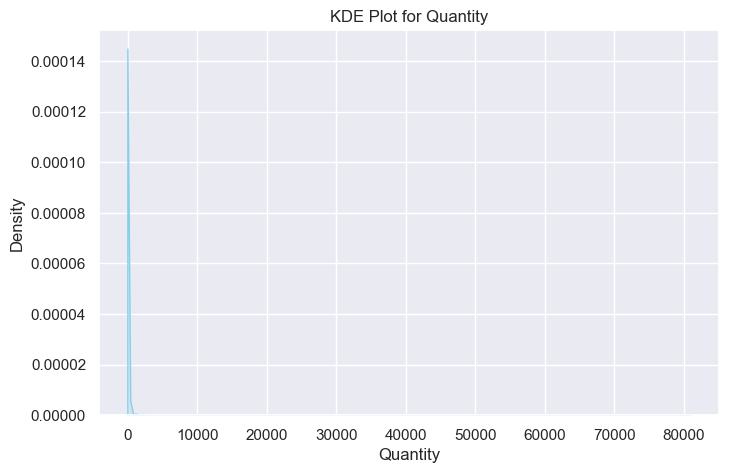

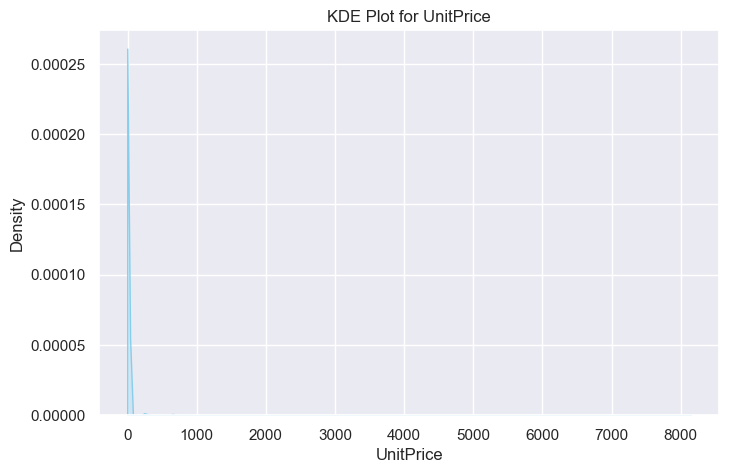

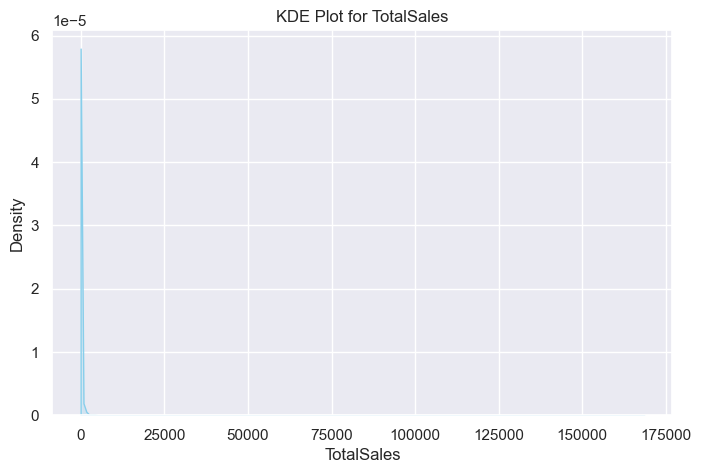

In [194]:
# Assuming df is your DataFrame that contains these numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalSales']

# Plot KDE for each feature in the numerical_features list
for feature in num_features:
    plt.figure(figsize=(8, 5))  # Set figure size
    sns.kdeplot(data=data_clv, x=feature, fill=True, color='skyblue')
    plt.title(f'KDE Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


**Insights**
- All the columns are skewed which suggests that there could be outliers or extreme values that are pulling the distribution to the right.

#### b). Top 10 most purchased products based on 'Description'

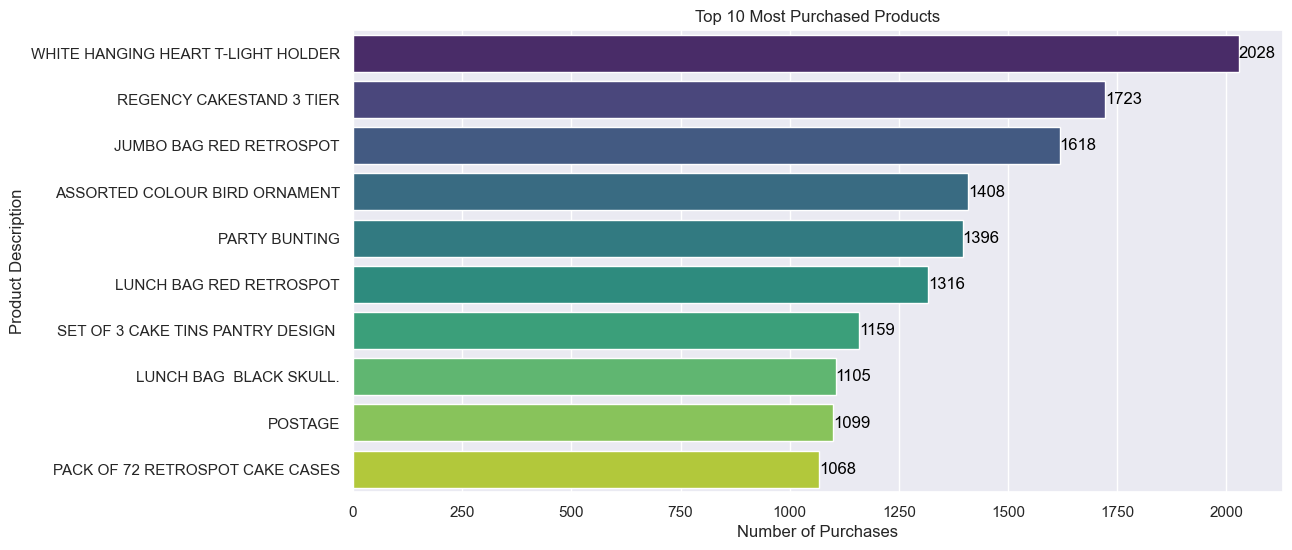

In [197]:
top_products = data_clv['Description'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))  # Set figure size
bar_plot = sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')

# Step 3: Add labels to the bars
for index, value in enumerate(top_products.values):
    bar_plot.text(value, index, f'{value}', color='black', va='center')

plt.show()


**General Observations:**

* **Product Diversity:** The chart shows a variety of products, ranging from home decor (hanging heart, cake stand) to party supplies (bunting, cake cases) and personal items (lunch bags).
* **Popularity:** The clear leader is the "WHITE HANGING HEART T-LIGHT HOLDER," followed by the "REGENCY CAKESTAND 3 TIER" and "JUMBO BAG RED RETROSPOT."

**Specific Insights:**

* **Home Decor:** The top three products all have a home decor theme, suggesting a strong demand for decorative items.
* **Party Supplies:** Products like "PARTY BUNTING" and "PACK OF 72 RETROSPOT CAKE CASES" indicate popularity for festive occasions and celebrations.
* **Everyday Essentials:** Items like "LUNCH BAG RED RETROSPOT" and "LUNCH BAG BLACK SKULL" highlight the need for practical, everyday products.
* **Retro Trend:** The presence of "RETROSPOT" in multiple products suggests a current trend or preference for retro-inspired designs.
* **Postage:** The inclusion of "POSTAGE" as a top-purchased item might indicate a high volume of online orders or a significant portion of the business being rall business performance.


#### c). Top 10 Products by Total Sales

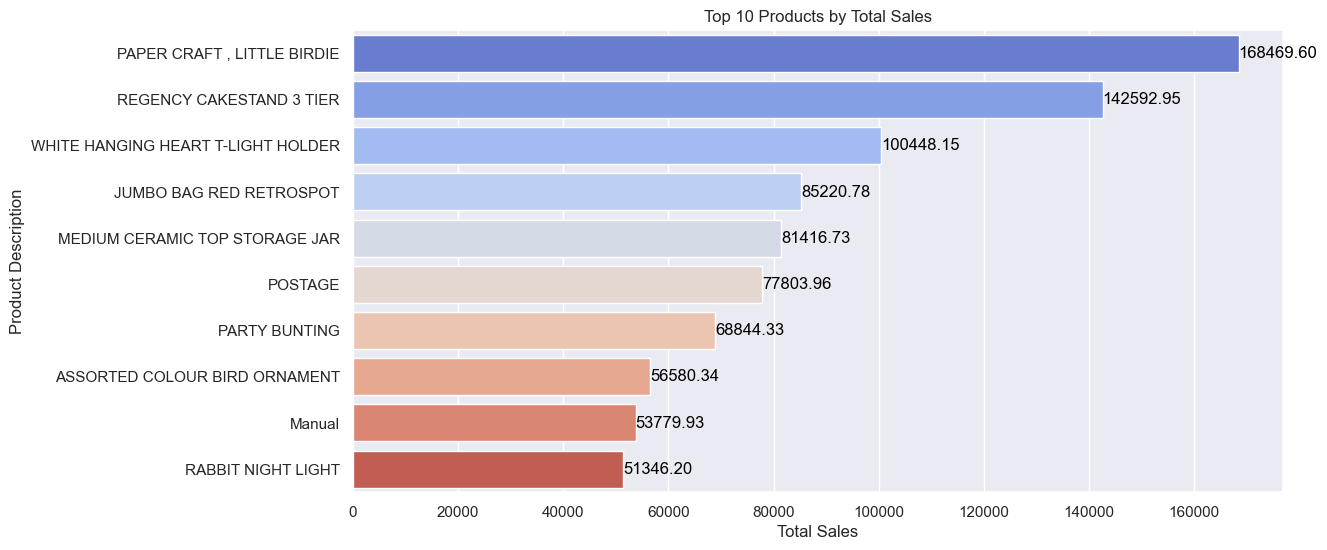

In [198]:
top_sales_products = data_clv.groupby('Description')['TotalSales'].sum().nlargest(10)

plt.figure(figsize=(12, 6))  # Set figure size
bar_plot = sns.barplot(x=top_sales_products.values, y=top_sales_products.index, palette='coolwarm')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')

for index, value in enumerate(top_sales_products.values):
    bar_plot.text(value, index, f'{value:.2f}', color='black', va='center')

plt.show()


**General Observations:**

* **Product Diversity:** The chart shows a variety of products, ranging from home decor (hanging heart, cake stand) to office supplies (manuals) and novelty items (rabbit night light).
* **Sales Variation:** There's a significant difference in sales between the top-selling product ("PAPER CRAFT, LITTLE BIRDIE") and the rest, indicating a clear leader.

**Specific Insights:**

* **Paper Crafts:** The top-selling product, "PAPER CRAFT, LITTLE BIRDIE," suggests a strong demand for creative and DIY activities.
* **Home Decor:** Products like "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER" continue to be popular, indicating a consistent demand for decorative items.
* **Everyday Essentials:** Items like "MEDIUM CERAMIC TOP STORAGE JAR" and "POSTAGE" highlight the need for practical, everyday products.
* **Novelty Items:** Products like "RABBIT NIGHT LIGHT" show a demand for unique and whimsical items.
* **Seasonal Trends:** While not explicitly shown in the chart, it's possible that some products have seasonal variations in sales (e.g., party bunting ferall business performance.


#### d). Top 10 Products Sold by Quantity

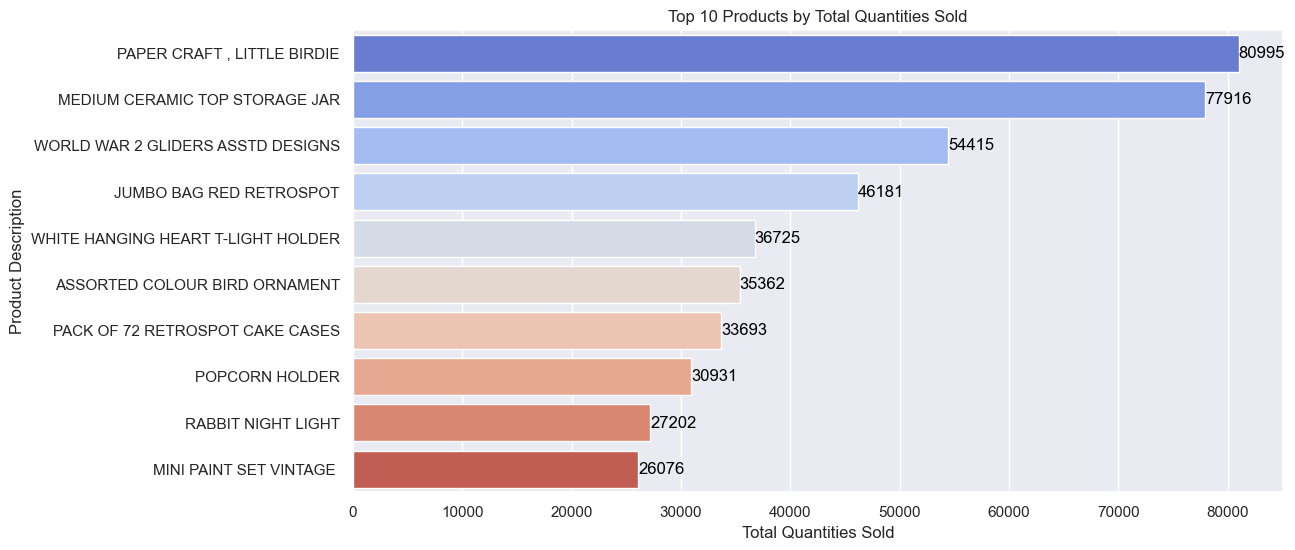

In [199]:
top_quantity_products = data_clv.groupby('Description')['Quantity'].sum().nlargest(10)

# Step 2: Plot the top 10 products based on total quantities sold
plt.figure(figsize=(12, 6))  # Set figure size
bar_plot = sns.barplot(x=top_quantity_products.values, y=top_quantity_products.index, palette='coolwarm')
plt.title('Top 10 Products by Total Quantities Sold')
plt.xlabel('Total Quantities Sold')
plt.ylabel('Product Description')

# Step 3: Add labels to the bars
for index, value in enumerate(top_quantity_products.values):
    bar_plot.text(value, index, f'{value}', color='black', va='center')

plt.show()

**Specific Insights:**

* **Storage and Organization:** Products like "MEDIUM CERAMIC TOP STORAGE JAR" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS" indicate a need for storage and organization solutions.
* **Home Decor:** Items like "WHITE HANGING HEART T-LIGHT HOLDER" and "ASSORTED COLOUR BIRD ORNAMENT" continue to be popular, suggesting a consistent demand for decorative items.
* **Novelty Items:** Products like "RABBIT NIGHT LIGHT" and "MINI PAINT SET VINTAGE" show a demand for unique and whimsical items.



#### e). Top 5 Countries by Total Sales Value

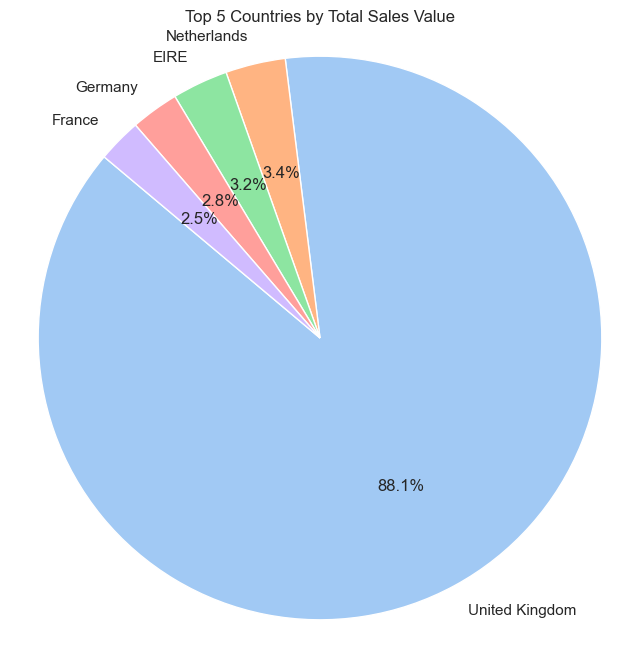

In [200]:
top_countries = data_clv.groupby('Country')['TotalSales'].sum().nlargest(5)

plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Countries by Total Sales Value')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Specific Insights:**

* **Market Dominance:** The United Kingdom clearly dominates the market, accounting for 88.1% of total sales.
* **Smaller Markets:** The remaining four countries (Netherlands, EIRE(Republic of Ireland), Germany, and France) collectively represent 11.9% of total sales, indicating a more concentrated market.
* **Domestic Market:** The significant share of the United Kingdom suggests a strong domestic market or a successful export strategy targeting UK consumers.
* **European Markets:** The presence of neighboring European countries (Netherlands, EIRE, Germany, and France) indicates potential for cross-border sales and expansion.
* **Market Penetration:** The relatively small market shares of the other countries suggest opportunities for increased market penetration and growth in those regions.

#### f). Which hour of the day, day of the week is when most transactions happen?

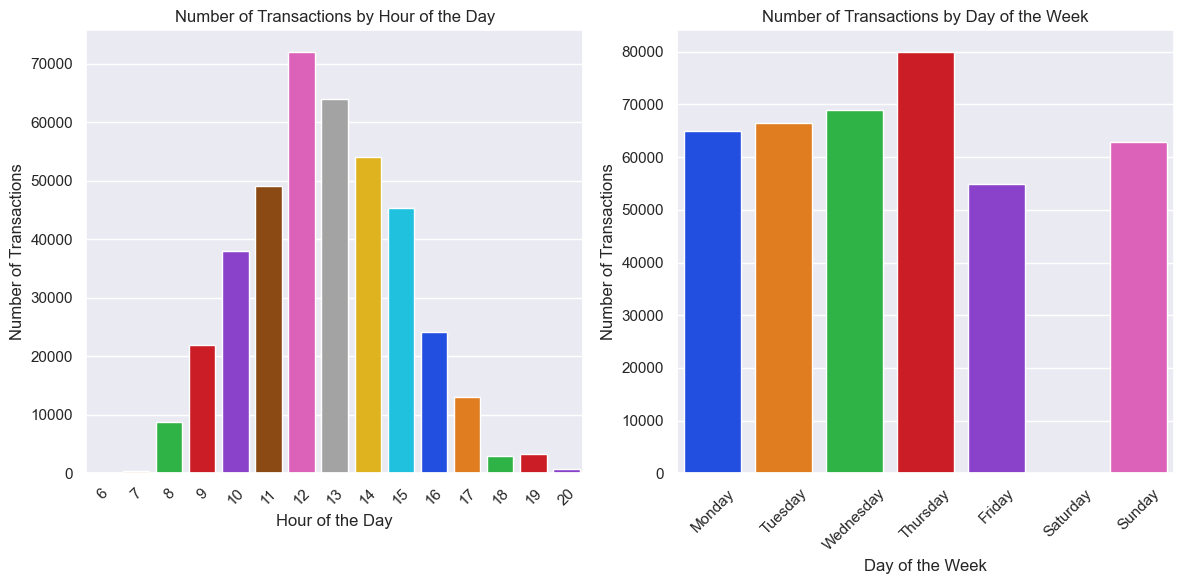

In [201]:
# Ensure InvoiceDate is in datetime format
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 1: Extract hour and day of the week
data_clv['Hour'] = data_clv['InvoiceDate'].dt.hour
data_clv['DayOfWeek'] = data_clv['InvoiceDate'].dt.day_name()

# Step 2: Count transactions by hour
hour_counts = data_clv['Hour'].value_counts().sort_index()

# Step 3: Count transactions by day of the week
day_counts = data_clv['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualization for Hour of the Day
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for the hour counts
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='bright')
plt.title('Number of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Visualization for Day of the Week
plt.subplot(1, 2, 2)  # Create a subplot for the day counts
sns.barplot(x=day_counts.index, y=day_counts.values, palette='bright')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()


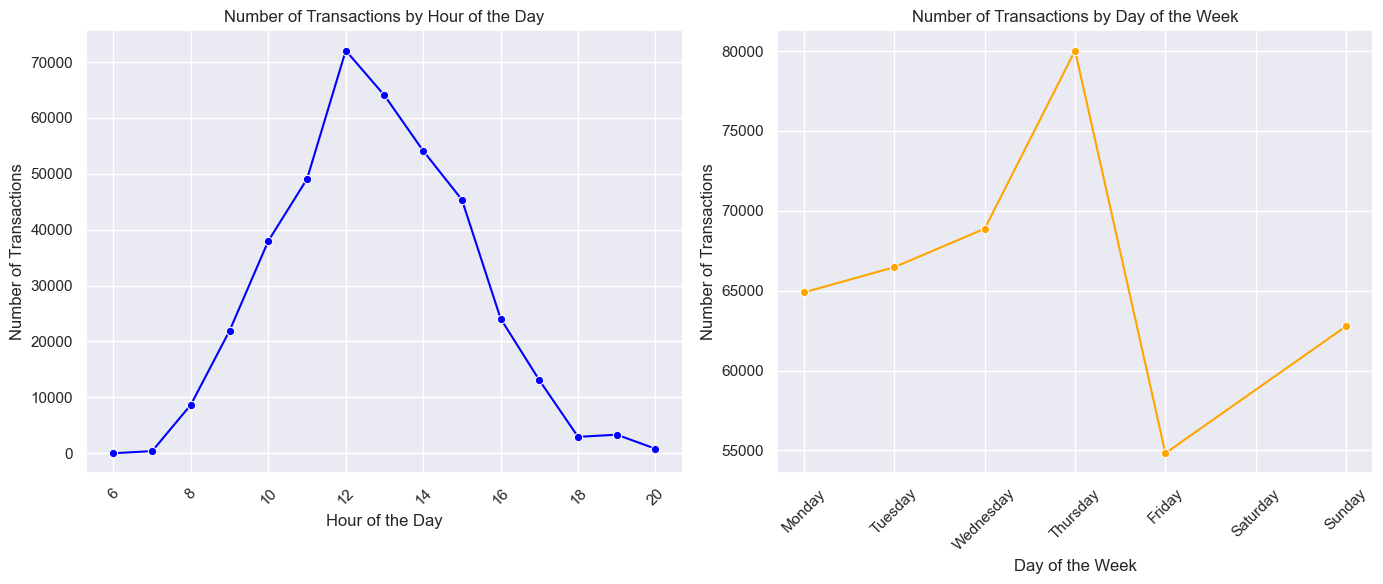

In [202]:
# Step 1: Extract hour and day of the week
data_clv['Hour'] = data_clv['InvoiceDate'].dt.hour
data_clv['DayOfWeek'] = data_clv['InvoiceDate'].dt.day_name()

# Step 2: Count transactions by hour
hour_counts = data_clv['Hour'].value_counts().sort_index()

# Step 3: Count transactions by day of the week
day_counts = data_clv['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualization for Hour of the Day as a line chart
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Create a subplot for the hour counts
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o', color='blue')
plt.title('Number of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Visualization for Day of the Week as a line chart
plt.subplot(1, 2, 2)  # Create a subplot for the day counts
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='orange')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()


**Insights**
- The transaction on the website starts to increase around 7 in the morning and peaks at noon. Then the trend slowly decreases and ends at 6 PM.
- People tend to purchase more from Monday to Thursday. Surprisingly, there are no transactions that took place on Saturdays for the given period in the data.


#### g). The trend of transactions for the given period?

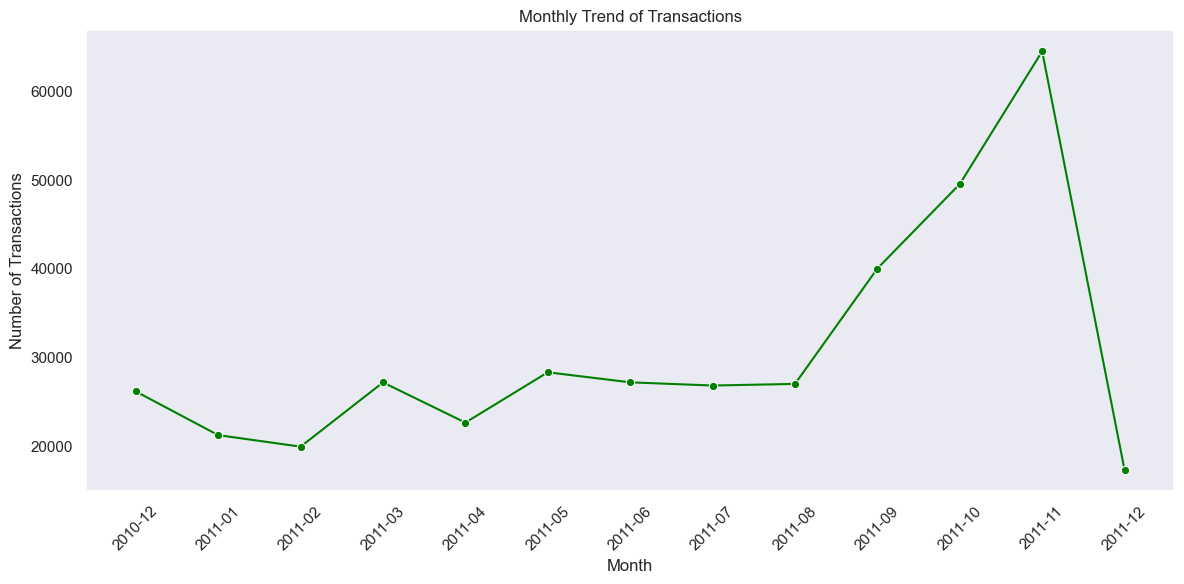

In [203]:
# Ensure InvoiceDate is in datetime format
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 1: Extract Month and Year
data_clv['YearMonth'] = data_clv['InvoiceDate'].dt.to_period('M')

# Step 2: Count transactions per month
monthly_trend = data_clv['YearMonth'].value_counts().sort_index()

# Step 3: Create a line chart to visualize the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker='o', color='green')
plt.title('Monthly Trend of Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Insights**

* **The monthly trend** reveals that the number of people using the platform is showing an increasing trend. Further, the rate of increase stayed flat till August 2011 and rapidly increasing from September 2011.
* **Seasonality:** The chart suggests some seasonality in transactions, with potential peaks and troughs at certain times of the year.
* **Growth Period:** The period from 2010-12 to 2011-11 experienced steady growth in transactions, indicating a positive trend in business activity.
* **Sharp Decline:** The sudden drop in transactions in 2011-12 is a significant outlier and may warrant further investigation to understand the underlying causes.



In [204]:
data_clv.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Hour,DayOfWeek,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Wednesday,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,Wednesday,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,2010-12


#### h). Sales distribution by month

In [205]:
data_clv.groupby(['YearMonth']).size()

YearMonth
2010-12    26157
2011-01    21229
2011-02    19927
2011-03    27175
2011-04    22642
2011-05    28320
2011-06    27185
2011-07    26825
2011-08    27007
2011-09    40028
2011-10    49554
2011-11    64531
2011-12    17304
Freq: M, dtype: int64

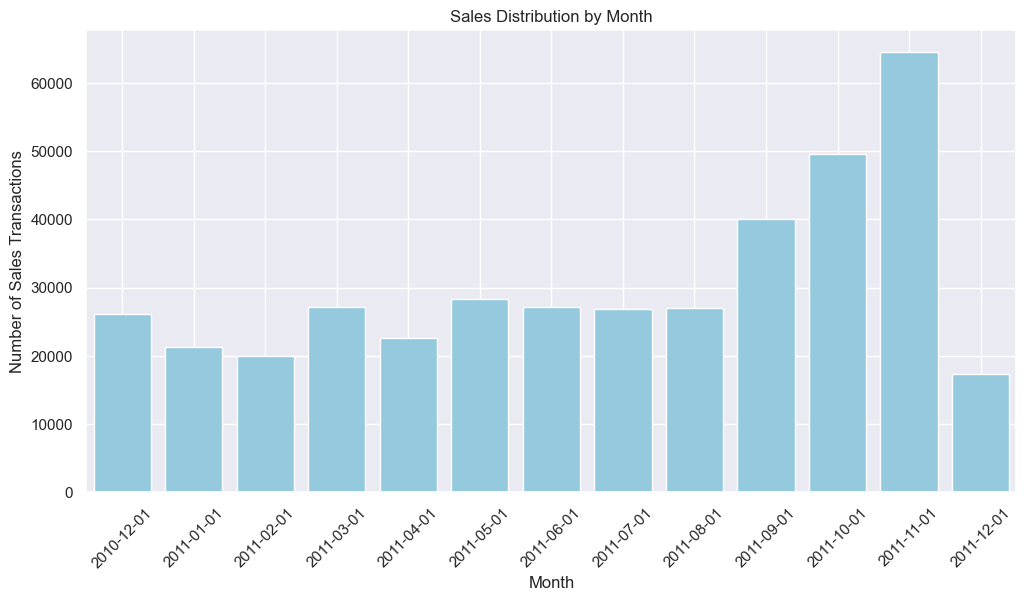

In [206]:
data_clv['YearMonth'] = data_clv['InvoiceDate'].dt.to_period('M')  # Extract Year-Month

# Aggregate data by 'YearMonth'
monthly_sales_count = data_clv.groupby(['YearMonth']).size().reset_index(name='Count')

# Convert 'YearMonth' to datetime format for proper plotting
monthly_sales_count['YearMonth'] = monthly_sales_count['YearMonth'].dt.to_timestamp()

# Plot sales distribution through months
plt.figure(figsize=(12, 6))
sns.barplot(x='YearMonth', y='Count', data=monthly_sales_count, color='skyblue')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### i). Total Sales Per Week

In [207]:
# Aggregate total sales by week
weekly_sales = data_clv.groupby(data_clv['InvoiceDate'].dt.to_period('W'))['TotalSales'].sum().reset_index()
weekly_sales.columns = ['InvoiceDate', 'TotalSales']



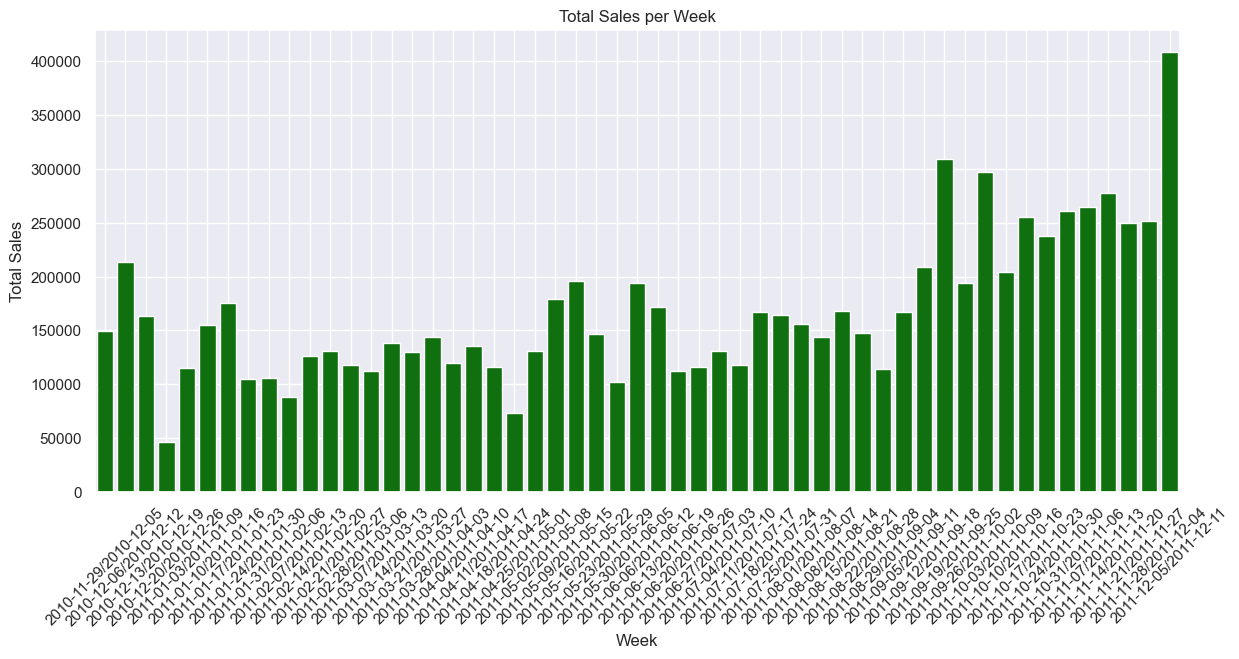

In [208]:
plt.figure(figsize=(14, 6))
sns.barplot(data=weekly_sales, x='InvoiceDate', y='TotalSales', color='green')
plt.title('Total Sales per Week')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Distribution of Order Sizes (Total Sales) by Invoice Number**

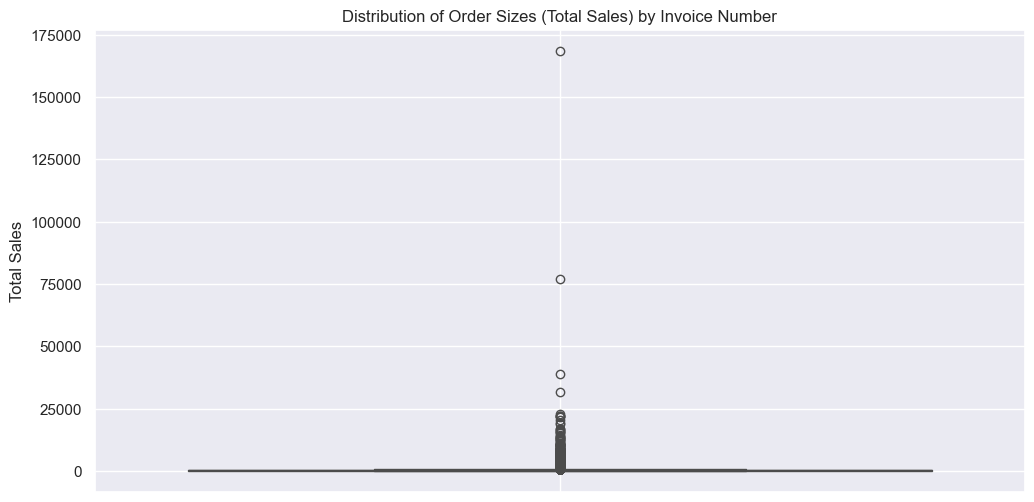

In [209]:
# Aggregate Total Sales by InvoiceNo
total_sales_by_invoice = data_clv.groupby('InvoiceNo')['TotalSales'].sum().reset_index()

# Create a boxplot for the TotalSales variable
plt.figure(figsize=(12, 6))
sns.boxplot(y=total_sales_by_invoice['TotalSales'])
plt.title('Distribution of Order Sizes (Total Sales) by Invoice Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


#### j). Distribution of customers by total revenue and number of orders


In [210]:
# Calculate total quantity and total sales per customer
customer_stats = data_clv.groupby('CustomerID').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalSales', 'sum')
).reset_index()


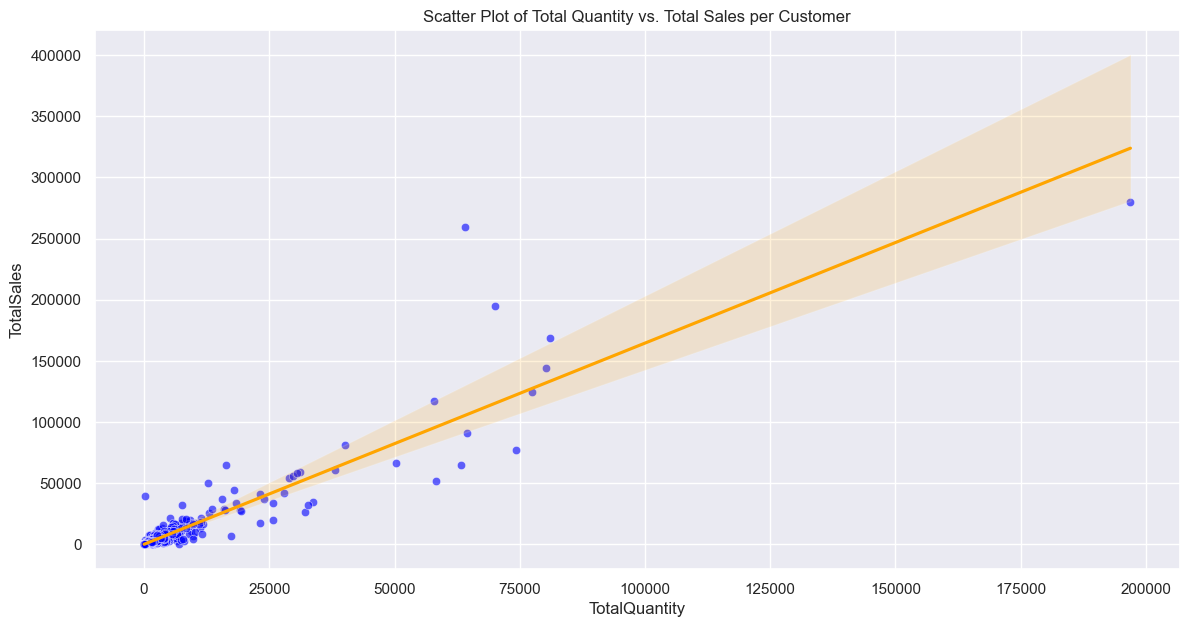

In [211]:
plt.figure(figsize=(14, 7))

# Create scatter plot
sns.scatterplot(data=customer_stats, x='TotalQuantity', y='TotalSales', color='blue', alpha=0.6)

# Adding titles and labels
plt.title('Scatter Plot of Total Quantity vs. Total Sales per Customer')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Sales')
plt.grid(True)

# Adding a regression line
sns.regplot(data=customer_stats, x='TotalQuantity', y='TotalSales', scatter=False, color='orange')

plt.show()


rend between total quantity sold and*total sales.

### Insights from the Scatter Plot

- **Positive Correlation**: You might observe a positive correlation where customers who purchase more (higher total q
ey.
* **Outliers:** A few data points, particularly on the higher end of both axes, seem to be outliers, indicating that some customers purchase significantly larger quantities or spend significantly more than the general trnd more.
* **Customer Segmentation:** The scatter plot might reveal different customer segments based on their purchasing behavior. For example, customers who consistently purchase larger quantities and spend more could be identified as high-value customers.
* **Outlier Analysis:** Analyzing the outliers could provide insights into factors that influence exceptional spending behavior. These could include specific product categories, promotions, or customer charaase customer satisfaction.
uetween total revenue and the number of orders per customer.

#### k). Revenue contribution by different customer segments (e.g., high-value vs. low-value customers)

In [212]:
# Calculate total sales per customer
customer_stats = data_clv.groupby('CustomerID').agg(
    TotalSales=('TotalSales', 'sum')
).reset_index()

# Create revenue segments based on quantiles
quantiles = customer_stats['TotalSales'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()
labels = ['Low Value', 'Medium Value', 'High Value', 'Very High Value']

# Assign segments based on quantiles
customer_stats['Segment'] = pd.cut(customer_stats['TotalSales'], bins=quantiles, labels=labels, include_lowest=True)


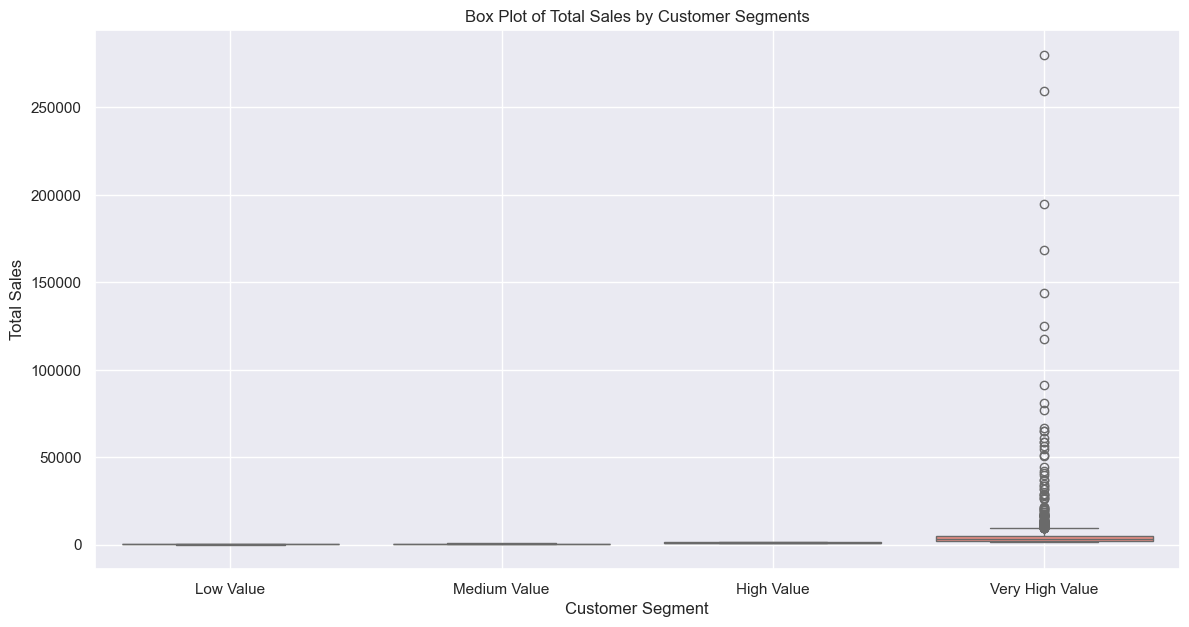

In [213]:
plt.figure(figsize=(14, 7))

# Create box plot of TotalSales segmented by customer segments
sns.boxplot(data=customer_stats, x='Segment', y='TotalSales', palette='Set3')

# Adding titles and labels
plt.title('Box Plot of Total Sales by Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Insights:**

* **High-Value Customers:** The "Very High Value" segment has the highest median total sales, indicating that customers in this segment generally spend more than those in other segments. The presence of outliers further highlights the existence of extremely high-spending customers within this segment.

* **Outlier Analysis:** The outliers in the "Very High Value" segment highlight the potential for significant revenue contributions from a small number of high-spending customers.


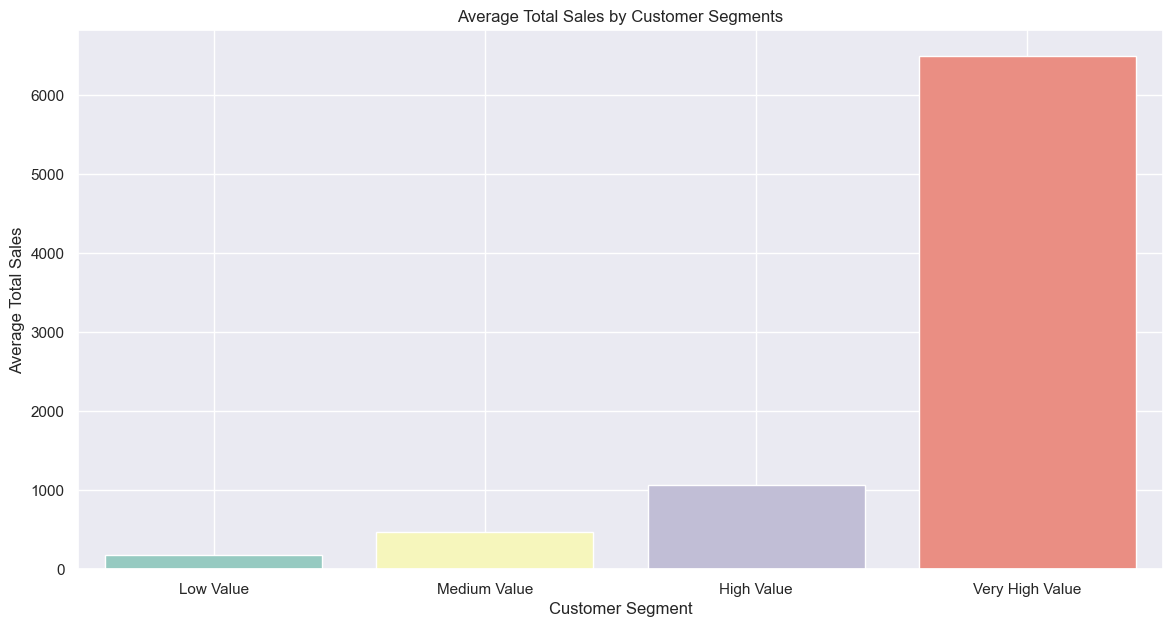

In [214]:
# Calculate mean total sales per segment
mean_sales_by_segment = customer_stats.groupby('Segment')['TotalSales'].mean().reset_index()

plt.figure(figsize=(14, 7))

# Create bar plot of mean TotalSales segmented by customer segments
sns.barplot(data=mean_sales_by_segment, x='Segment', y='TotalSales', palette='Set3')

# Adding titles and labels
plt.title('Average Total Sales by Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Sales')
plt.grid(True)
plt.show()


**Insights:**

* **Increasing Average Sales:** As customer segments move from "Low Value" to "Very High Value," the average total sales increase significantly.
* **Large Difference:** The difference in average sales between the "Very High Value" and "Low Value" segments is substantial, indicating a wide range of spending patterns.
* **High-Value Customers:** The "Very High Value" segment has the highest average total sales, confirming their superior spending power.
* **Low-Value Customers:** The "Low Value" segment has the lowest average total sales, suggesting a need to focus on increasing their spending.
* **Segmentation Effectiveness:** The clear differences in average sales across segments demonstrate the effectiveness of customer segmentation in identifying high-value customers.

#### l). Are there any seasonal patterns in sales or customer activity?

In [215]:
# Create 'Month' and 'DayOfWeek' columns
data_clv['Month'] = data_clv['InvoiceDate'].dt.month
data_clv['DayOfWeek'] = data_clv['InvoiceDate'].dt.day_name()  # or dt.weekday() for numeric values


In [216]:
# Aggregate sales by Month and Day of Week
sales_heatmap_data = data_clv.groupby(['Month', 'DayOfWeek'])['TotalSales'].sum().unstack()

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_heatmap_data = sales_heatmap_data.reindex(columns=days_order)


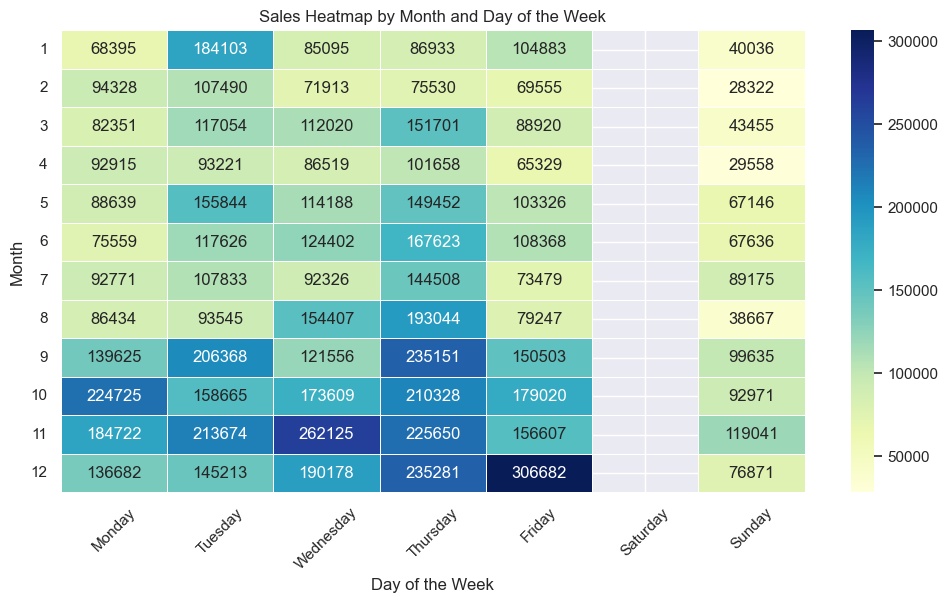

In [217]:
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(sales_heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)

# Adding titles and labels
plt.title('Sales Heatmap by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Insights:**

* **Seasonal Patterns:** The heatmap reveals distinct seasonal patterns in sales, with certain months and days of the week consistently showing higher or lower sales volumes.
* **Day of the Week Variations:** There are clear differences in sales performance across different days of the week, indicating that certain days are more or less conducive to sales.
* **Peak Months:** Identify the months with the highest overall sales volumes, suggesting that these periods might be ideal for promotions or increased marketing efforts.
* **Peak Days:** Determine the days of the week with the highest sales, providing insights into when customers are most likely to make purchases.
* **Seasonal Trends:** Analyze the seasonal patterns to understand how external factors like holidays, weather, or events might influence sales.
* **Day-to-Day Fluctuations:** Examine the variations in sales across different days of the week to identify potential trends or anomalies.

In [221]:
######################################################END-of-EDA######################################################